# Introdução 

Neste estudo, a ideia é mergulhar fundo nos principais canais do Youtube em termos de volume de inscritos e visualizações. Os dados aqui analisados foram baixados da plataforma Kaggle, bastante popular por suas competições de Machine Learning, e foram originadas de uma raspagem dos dados do Youtube.  

A partir de variáveis diversas como data de criação do canal, volume de inscritos no canal, volume de visualizações, país de origem do criador e categoria de vídeo postado, pretendemos analisar e correlacionar as variáveis visando obter insights valiosos sobre a plataforma. 

O conjunto de dados é composto por 28 colunas e 995 linhas. No 'Dicionário das Variáveis' serão colocadas apenas as colunas que foram utilizadas no estudo. 

### Dicionário de Variáveis 
- rank: Posição do canal no Youtube com base no número de inscritos. <br> 
- Youtuber: Nome do canal.<br> 
- subscribers: Número de inscritos no canal.<br> 
- video views: Total de visualizações obtidos pelo canal compilando todos os vídeos. <br> 
- category: Nicho do canal.<br> 
- uploads: Número total de vídeos enviados para o canal.<br>  
- Country: País de origem do canal. <br> 
- video_views_rank: Classificação do canal com base no total de visualizações do canal.<br> 
- channel_type_rank: Classificação do canal com base no nicho do canal. <br> 
- created_year: Ano em que o canal foi criado. <br> 
- Population: População total do país de criação do canal. <br> 
- Unemployment rate: Taxa de desemprego do país de criação do canal.<br> 
- Urban_population: Percentual da população do país de origem que vivem em áreas urbanas.<br> 

Link para o dataset: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

## Importando as Bibliotecas

In [41]:
# Biblioteca para tratar dados 
import pandas as pd 
import numpy as np 

# Biblioteca para EDA
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

# Biblioteca para Plot de Mapas 
import folium

# Não exibir warnings 
import warnings 
warnings.filterwarnings("ignore")

## Inspeção dos Dados 

In [42]:
# Importar o dataset 
df = pd.read_csv('Global Youtube Statistics.csv', encoding='unicode_escape')
df.head() 

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [43]:
print(f"O dataframe possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataframe possui 995 linhas e 28 colunas.


In [44]:
#análise das variáveis numéricas
df_drop = df.drop(columns = ['created_date', 'Latitude', 'Longitude','subscribers_for_last_30_days','lowest_monthly_earnings',
                         'video_views_for_the_last_30_days','highest_yearly_earnings',
                         'Gross tertiary education enrollment (%)','lowest_yearly_earnings'], axis = 1)
df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,995.0,4.980000e+02,2.873761e+02,1.00,2.495000e+02,4.980000e+02,7.465000e+02,9.950000e+02
subscribers,995.0,2.298241e+07,1.752611e+07,12300000.00,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video views,995.0,1.103954e+10,1.411084e+10,0.00,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,995.0,9.187126e+03,3.415135e+04,0.00,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
video_views_rank,994.0,5.542489e+05,1.362782e+06,1.00,3.230000e+02,9.155000e+02,3.584500e+03,4.057944e+06
country_rank,879.0,3.860535e+02,1.232245e+03,1.00,1.100000e+01,5.100000e+01,1.230000e+02,7.741000e+03
channel_type_rank,962.0,7.457193e+02,1.944387e+03,1.00,2.700000e+01,6.550000e+01,1.397500e+02,7.741000e+03
highest_monthly_earnings,995.0,5.898078e+05,1.148622e+06,0.00,4.350000e+04,2.127000e+05,6.068000e+05,1.360000e+07
created_year,990.0,2.012630e+03,4.512503e+00,1970.00,2.009000e+03,2.013000e+03,2.016000e+03,2.022000e+03
Population,872.0,4.303873e+08,4.727947e+08,202506.00,8.335541e+07,3.282395e+08,3.282395e+08,1.397715e+09


In [45]:
# Verificação do tipo da variável 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [46]:
#contagem de valores números
nulos = df.isnull().sum()
nulos 

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

## Explorando os dados 
<br>
Correlação entre as principais variáveis numéricas utilizadas: 

<AxesSubplot:>

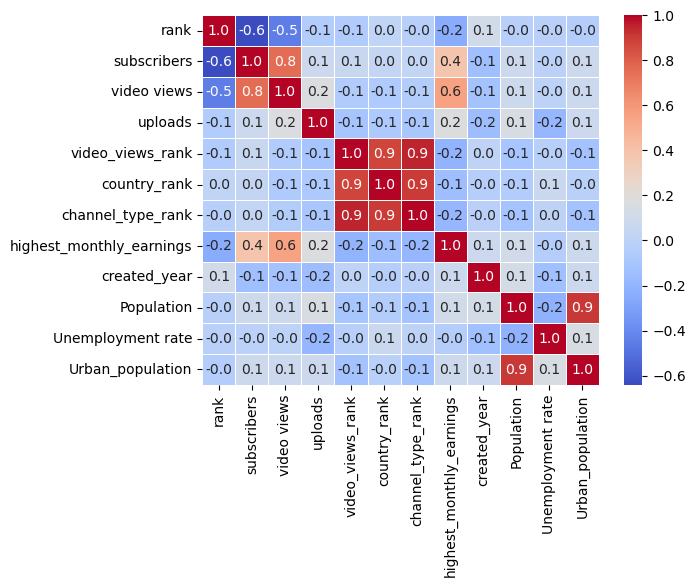

In [47]:
drop = df.drop(columns = ['created_date', 'Latitude', 'Longitude','subscribers_for_last_30_days','lowest_monthly_earnings',
                         'video_views_for_the_last_30_days','highest_yearly_earnings',
                         'Gross tertiary education enrollment (%)','lowest_yearly_earnings'], axis = 1)

correlation = drop.corr()
plot_correlation = sns.heatmap(correlation, cmap='coolwarm', annot = True, fmt=".1f", linewidths =.6)
plot_correlation 

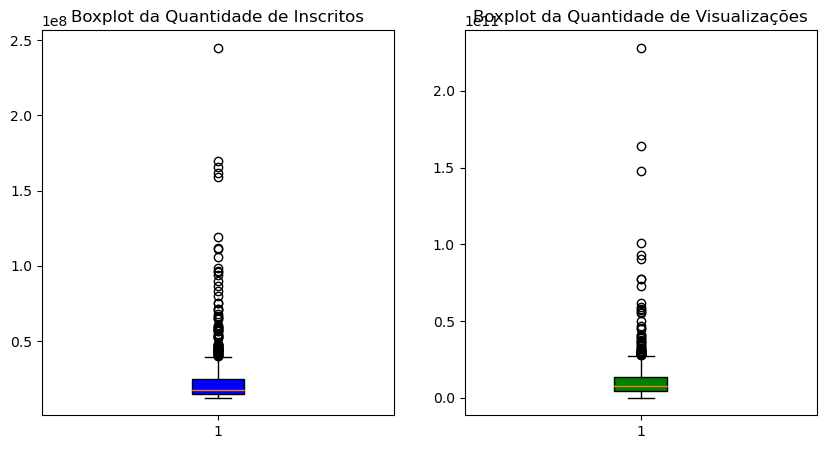

In [48]:
#Criação de figura com 2 subplots 
fig, axs = plt.subplots(1,2, figsize=(10,5))

#Boxplot para variável subscribers 
bp1 = axs[0].boxplot(df['subscribers'], patch_artist = True)
axs[0].set_title('Boxplot da Quantidade de Inscritos')
bp1['boxes'][0].set_facecolor('blue')


#Boxplot para variável video views
bp2 = axs[1].boxplot(df['video views'], patch_artist = True)
axs[1].set_title('Boxplot da Quantidade de Visualizações')
bp2['boxes'][0].set_facecolor('green')

#Plot dos Gráficos 
plt.show()

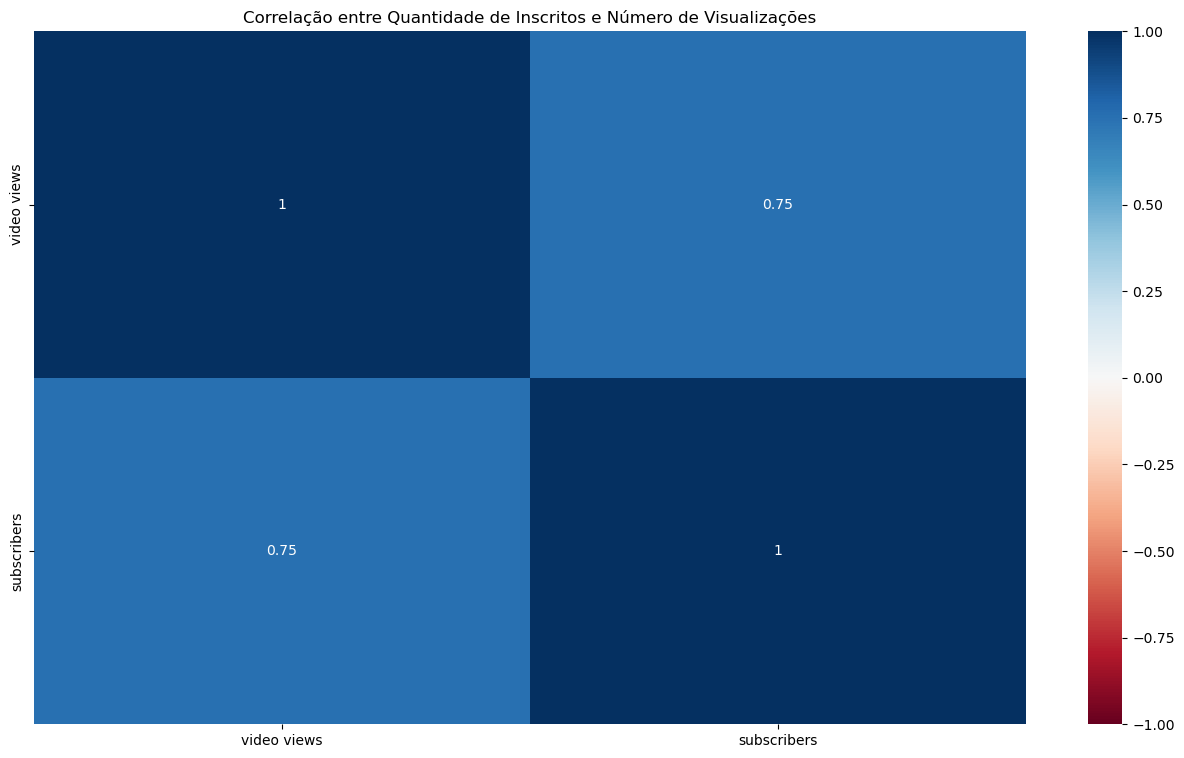

In [49]:
# Plot heatmap
plt.figure(figsize = (16, 9))
plt.title('Correlação entre Quantidade de Inscritos e Número de Visualizações')
sns.heatmap(df[['video views', 'subscribers']].corr(), annot = True, vmin = -1, vmax = 1, cmap = 'RdBu')
plt.show();

### Quais as correlações entre Categorias e Ganho Anual? Existem categorias mais rentáveis? 

In [50]:
df_sorted = df['category'].value_counts().reset_index()
df_sorted.columns = ['category', 'Count']
df_sorted = df_sorted.sort_values(by='Count', ascending=False)

fig = px.bar(df_sorted, x='category', y='Count', color='category')
fig.update_layout(title="Distribuição de Top Canais por Categoria", 
                  xaxis_title="Categoria", 
                  yaxis_title="Contagem de Canais")
fig.show()

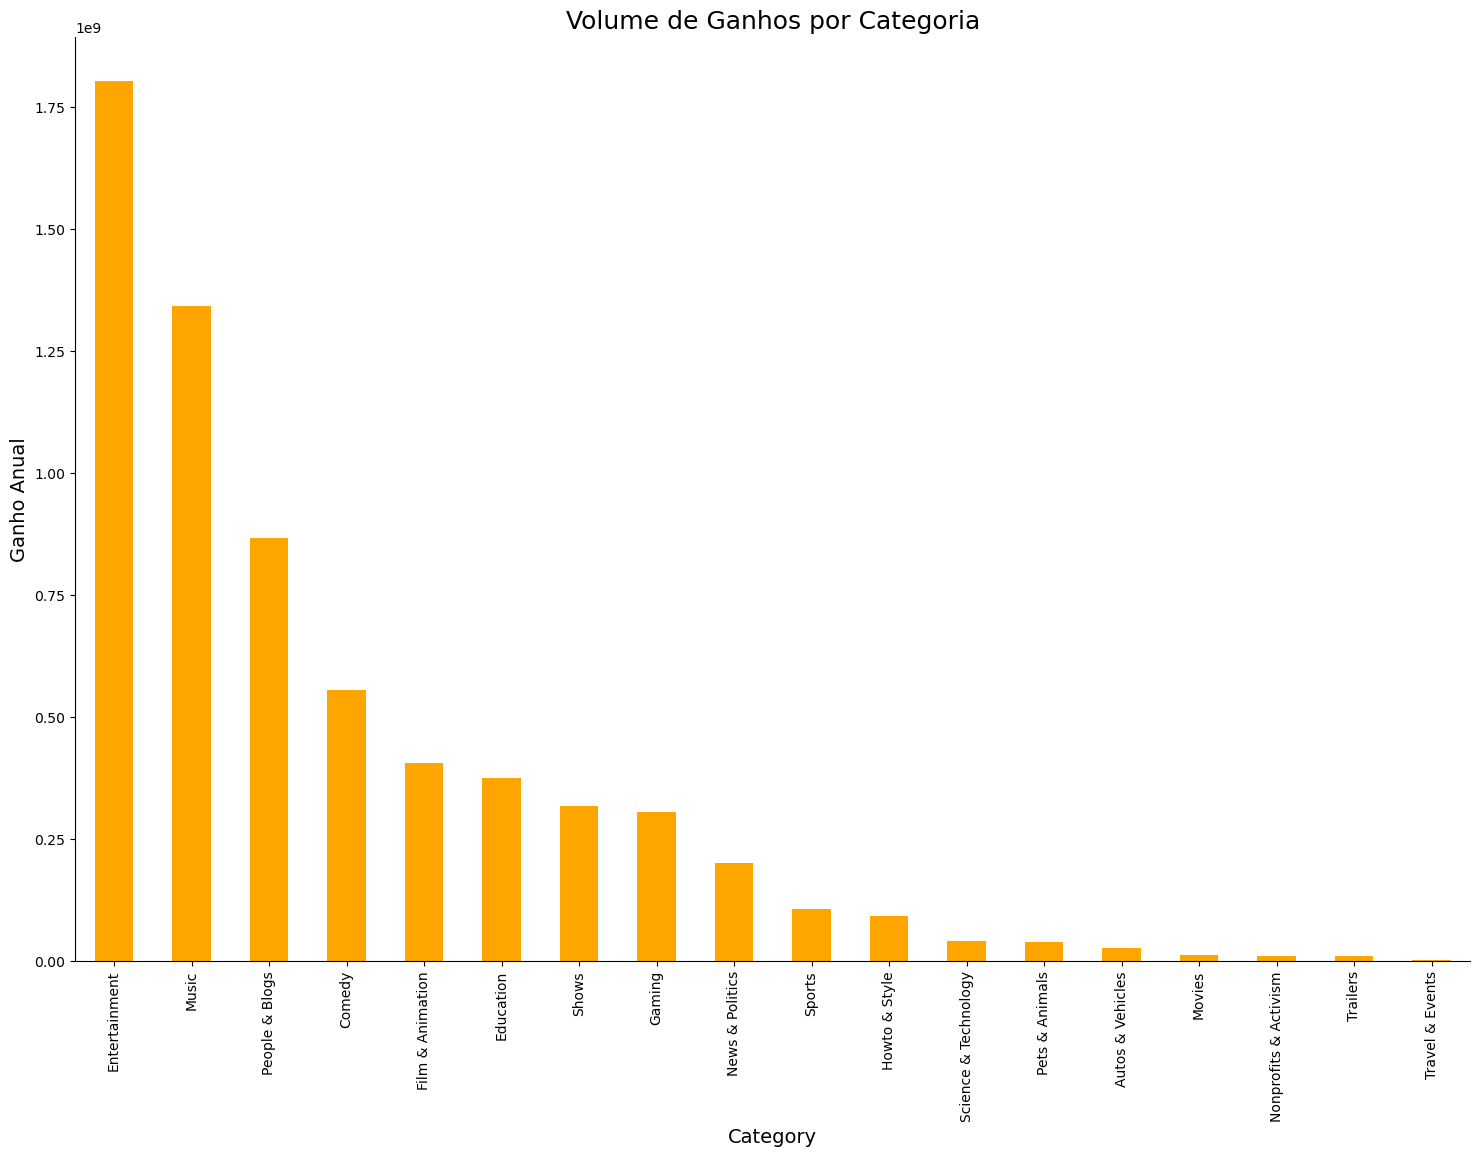

In [51]:
df_category = df.groupby('category')['highest_yearly_earnings'].sum()
df_category = df_category.sort_values(ascending=False)

# Plot do Gráfico + Rótulos
plt.figure(figsize=(18, 12))
ax = df_category.plot(kind='bar', color='orange')
ax.set_title('Volume de Ganhos por Categoria', fontsize=18)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Ganho Anual',fontsize=14)

# Limpar visualização e Plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

As categorias de Entretenimento, Música e Pessoas/Blog além de concentrarem grande parte dos maiores canais da amostra, apresentam uma alta rentabilidade comparada com outras categorias. Destaque para a categoria de Games, que apesar de figurarem na 4° colocação no volume de grandes canais, caem para 8° nos maiores ganhos observados. 

### Qual a distribuição destes canais a partir da data de criação do canal e possíveis tendências

In [52]:
#Retirando o outlier presente na variável created_year
df_created = df.query('`created_year` > 1970')

#Plot do Histograma 
fig = px.histogram(df_created,"created_year", color_discrete_sequence=['green'])
fig.update_layout(title="Distribuição por Ano de Criação do Canal", 
                  xaxis_title="Ano", 
                  yaxis_title="Contagem de Canais")
fig.show()

Análise dos canais da amostra criados até 2014.

In [53]:
df_old_channel = df.query('`created_year` < 2015')

df_sorted = df_old_channel['category'].value_counts().reset_index()
df_sorted.columns = ['category', 'Count']
df_sorted = df_sorted.sort_values(by='Count', ascending=False)

fig = px.bar(df_sorted, x='category', y='Count', color='category')
fig.update_layout(title="Distribuição de Top Canais por Categoria", 
                  xaxis_title="Categoria", 
                  yaxis_title="Contagem de Canais")
fig.show()

Análise dos canais da amostra criados depois de 2014.

In [54]:
df_new_channel = df.query('`created_year` > 2014')

df_sorted = df_new_channel['category'].value_counts().reset_index()
df_sorted.columns = ['category', 'Count']
df_sorted = df_sorted.sort_values(by='Count', ascending=False)

fig = px.bar(df_sorted, x='category', y='Count', color='category')
fig.update_layout(title="Distribuição de Top Canais por Categoria", 
                  xaxis_title="Categoria", 
                  yaxis_title="Contagem de Canais")
fig.show()

Como esperado, grande parte dos canais foram criados no mínimo 5 anos atrás, demonstrando a necessidade de uma certa maturação e formação de público para crescimento do número de inscritos e visualizações. Apesar disso, quando quebramos a amostra entre dois grupos - Grupo A com data de criação do canal até 2014 e Grupo B com data de criação pós 2014 - verifica-se que as categorias de maior destaque do passado, como Música, tem cedido seu espaço para os canais de categoria Entretenimento. 

### Como a população total do país de origem do canal se correlaciona com o número de inscritos do canal? 

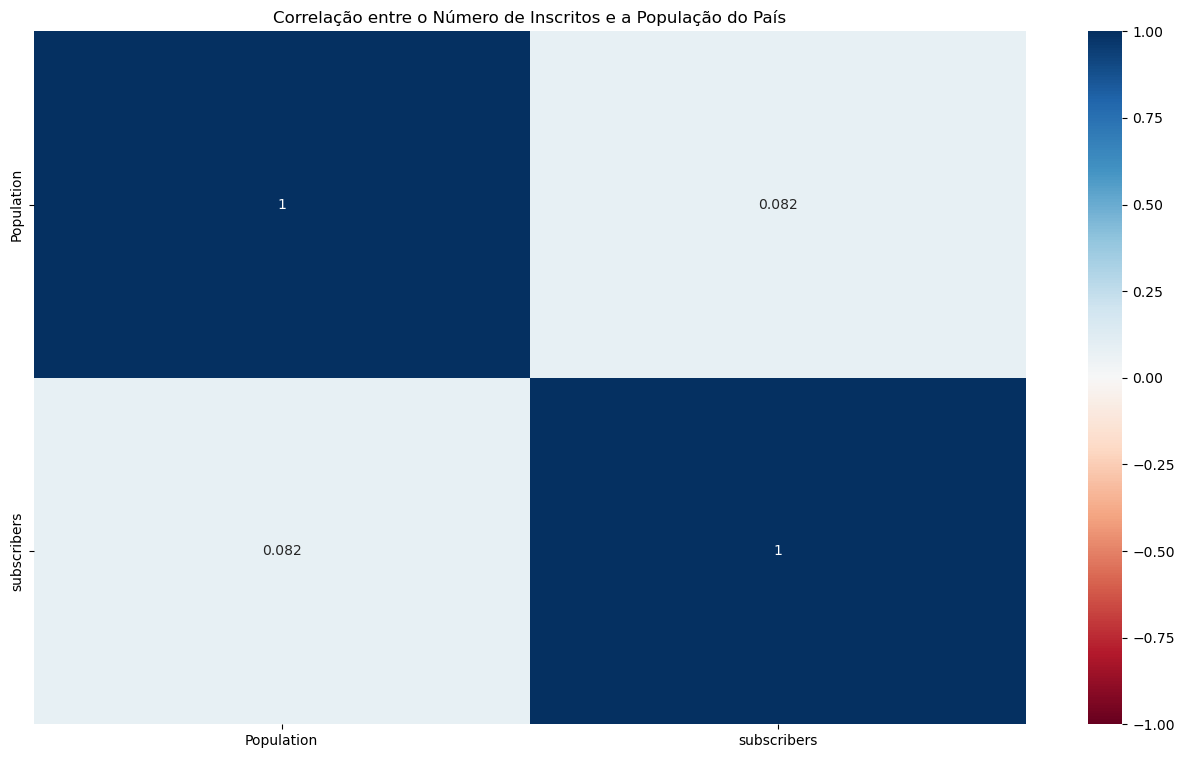

In [55]:
# Plot heatmap
plt.figure(figsize = (16, 9))
plt.title('Correlação entre o Número de Inscritos e a População do País')
sns.heatmap(df[['Population', 'subscribers']].corr(), annot = True, vmin = -1, vmax = 1, cmap = 'RdBu')
plt.show();

In [56]:
df_sorted = df['Country'].value_counts().reset_index()
df_sorted.columns = ['Country', 'Count']
df_sorted = df_sorted.sort_values(by='Count', ascending=False)

fig = px.bar(df_sorted, x='Country', y='Count', color='Country')
fig.update_layout(title="Distribuição por País", 
                  xaxis_title="Nome do País", 
                  yaxis_title="Contagem de Canais")
fig.show()

### Há alguma relação entre ganhos anuais e volume de uploads? 

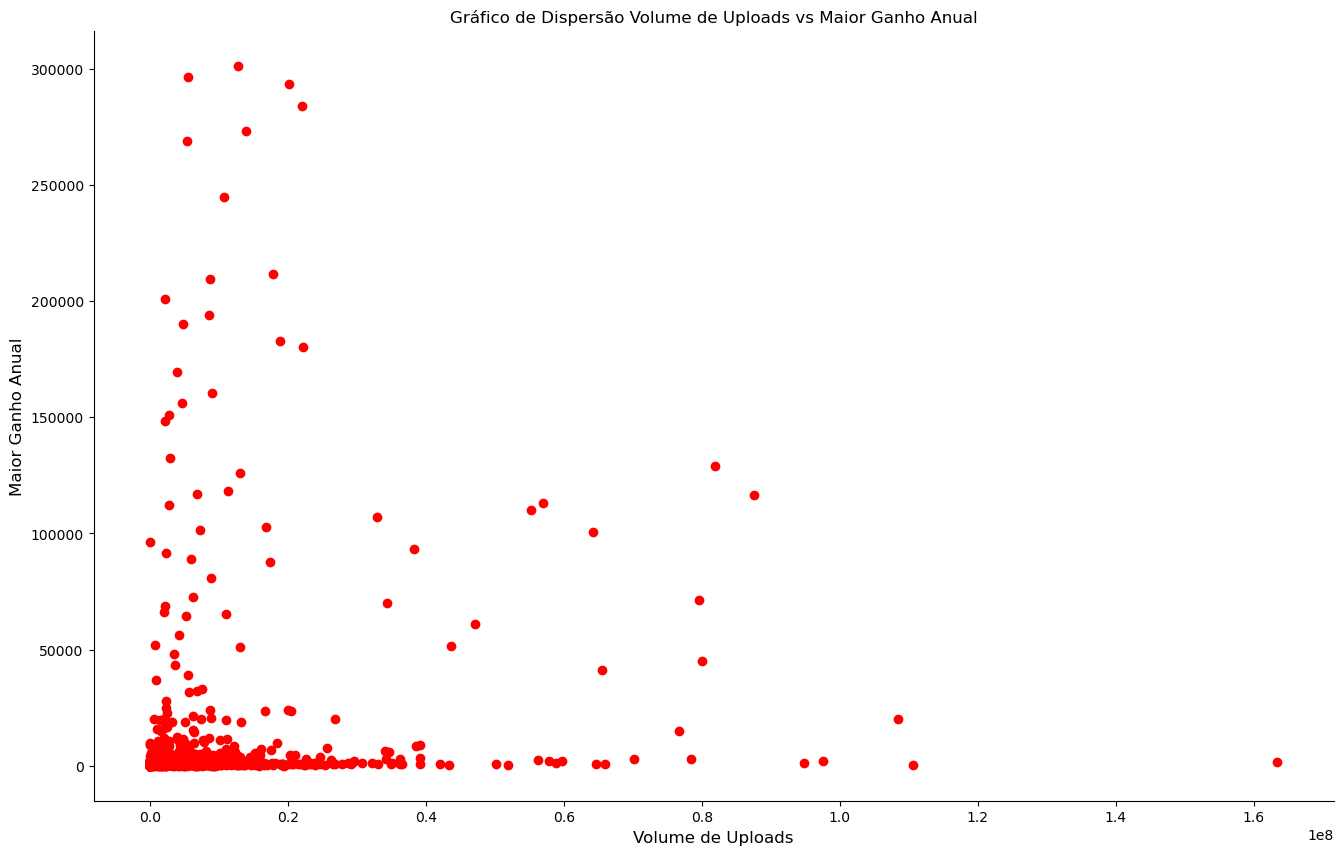

In [57]:
# Configurando gráfico de dispersão 
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(df['highest_yearly_earnings'], df['uploads'], c = "red")

#Título e Rótulos
ax.set_title('Gráfico de Dispersão Volume de Uploads vs Maior Ganho Anual', fontsize=12)
ax.set_xlabel('Volume de Uploads', fontsize=12)
ax.set_ylabel('Maior Ganho Anual',fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

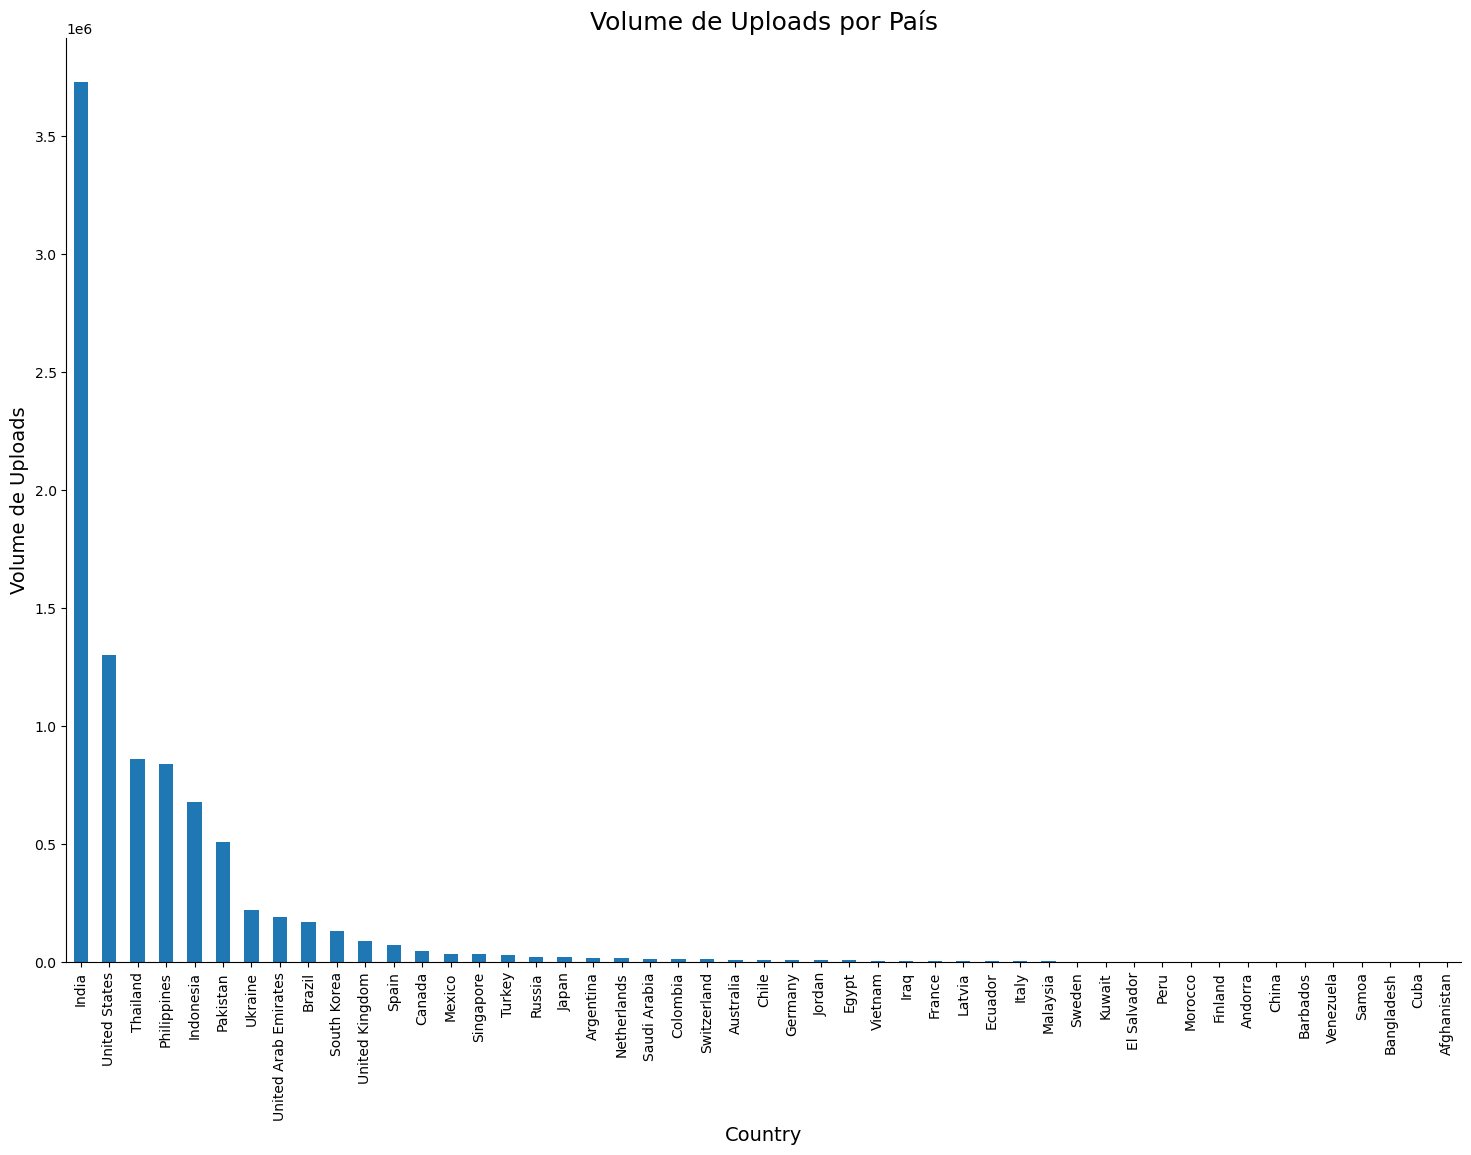

In [58]:
df_uploads = df.groupby('Country')['uploads'].sum()
df_uploads = df_uploads.sort_values(ascending=False)

# Plot do Gráfico + Rótulos
plt.figure(figsize=(18, 12))
ax = df_uploads.plot(kind='bar')
ax.set_title('Volume de Uploads por País', fontsize=18)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Volume de Uploads',fontsize=14)

# Limpar visualização e Plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

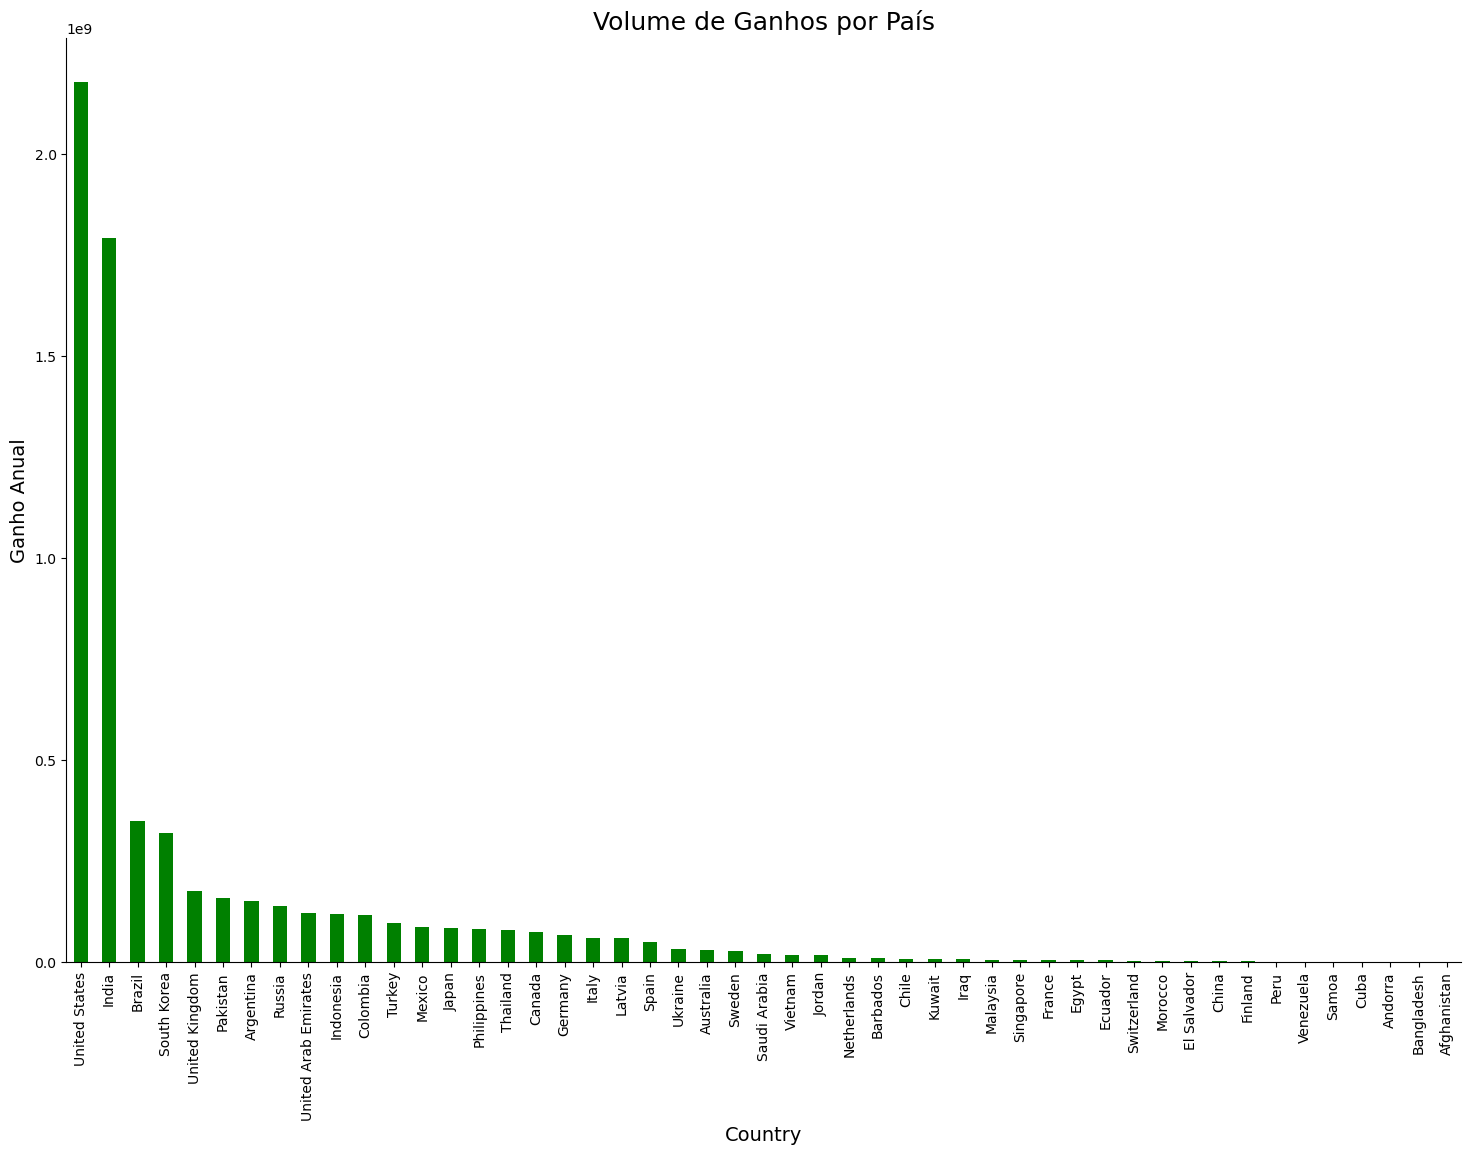

In [59]:
df_ganho = df.groupby('Country')['highest_yearly_earnings'].sum()
df_ganho = df_ganho.sort_values(ascending=False)

# Plot do Gráfico + Rótulos
plt.figure(figsize=(18, 12))
ax = df_ganho.plot(kind='bar', color='green')
ax.set_title('Volume de Ganhos por País', fontsize=18)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Ganho Anual',fontsize=14)

# Limpar visualização e Plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Evidencia-se que existe uma fraca correlação entre volume de uploads e ganhos anuais. Além da distribuição apresentar a existência de uma média no volume de uploads. 

## Conclusões 
<br>
- O local de origem do criador pouco importa. Pensando em alcançar maiores horizontes, talvez um fator que possa ser mais importante é a língua utilizada na criação do conteúdo; <br>
- Vivenciamos um contexto de ampla utilização das redes sociais. Eventos como estes podem ajudar a explicar a tendência de crescimento de categorias como Entretenimento e Pessoa/Blogs. Talvez compartilhar informações sobre seu dia a dia não seja tão ruim, né? <br>
- Os Estados Unidos apresentam uma grande rentabilidade na criação de conteúdo, enquanto a India figura, em termos de volume, como um grande produtor.<br>
- Volume de Views apresenta uma boa correlação com o número de inscritos, delimitar e cativar um público específico deveria ser um dos pontos considerados na criação de um canal. 
